---

# Буранов М.М. 

# Приоретизация гипотез и анализ результатов A/B-теста

## Введение 

Вместе с отделом маркетинга нам предстоить сформулировать гипотезы по улучшению каналов привлечения новых клиентов. Необходимо подготовить список гипотез, приоретизировать их с помощью двух фреймворков ICE и RICE и отоборат наиболее актуальные. 

После выбора гипотез мы будем должны провести A/B-тест. По результатам A/B-теста мы подсчитаем кумулятивные метрики, избавимся от выбросов, пересчитаем кумулятивные метрики, сравним данные. По результатам анализа мы должны подтвердить или отвергнуть гипотезу о равенстве генеральных совокупностей. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import datetime as dt
from scipy import stats as st
warnings.simplefilter('ignore')
pd.set_option('max_colwidth', 400)

## Приоритизация гипотез

Прочитаем файл с гипотезами. 

In [2]:
hypothesis = pd.read_csv('https://###.csv')

In [3]:
hypothesis.head(20)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Все параметры оценены по 10 бальной шкале. Подсчитаем RICE и ICE. 

In [4]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis.sort_values(by = ['RICE'], ascending = False)

,Hypothesis,Reach,Impact,Confidence,Efforts,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0


In [5]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
hypothesis.sort_values(by = ['ICE'], ascending = False).drop(columns=['RICE'])

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


Наиболее перспективные гипотезы по методу RICE - 7, 2, 0, 6. 

По методу ICE - 8, 0, 7, 6.

3 гипотезы попадают и в первый и второй список лидеров(7, 0, 6). Отличаются 2 гипотезой в RICE и 8 для ICE. 8 гипотеза воздействует на маленькое количество аудитории, поэтому имеет минимальный параметр Reach, при этом уровень воздействия и уверенности по 9. 2 гипотеза наборот воздействует на большую аудиторию, однако имеет меньшее воздействие(3). 

Также стоит проверить то, правильно ли сформулированы гипотезы. Необходимым критериям не соответсвуют гипотезы: 7, 8.

В приоритете остаются только гипотезы 2, 0, 6. Выберем гипотезу №2 , т.к. она обладает большей мощностью по RICE. 

Проведём А/B-тест, чтобы проверить гипотезу "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа". 

In [6]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,RICE,ICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,40.0,13.333333
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,4.0,2.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,56.0,7.000000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,9.0,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,3.0,1.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,4.0,1.333333
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,40.0,8.000000
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,112.0,11.200000
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.200000


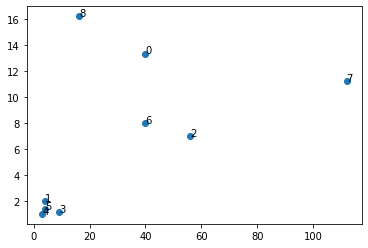

In [7]:
y = hypothesis['RICE'].to_list()
x = hypothesis['ICE'].to_list()
n = hypothesis.reset_index()['index'].to_list()

fig, ax = plt.subplots()
ax.scatter(y, x)


for i, txt in enumerate(n):
    ax.annotate(txt, (y[i], x[i]))

## Анализ A/B-теста

Мы провели A/B тест. Приступим к изучению данных. 

### Изучение данных из файла

Прочитаем результаты A/B теста из файлов. 

In [8]:
orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

In [9]:
visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [10]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В обоих датафреймах нужно изменить тип данных в колонках дат. 

### Изменение типов данных

In [14]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [15]:
orders['date']  = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

Тип данных изменили. 

<b> Проверка на уникальность пользователей между группами

In [16]:
a = orders[orders['group']=='A']
b = orders[orders['group']=='B']

users_a = a['visitorId'].drop_duplicates()
users_b = b['visitorId'].drop_duplicates()

users = pd.concat([users_a,users_b], axis=0)

users.count()

1089

1089 уникальных пользователей по каждой из групп. Проверим, пересекаются ли эти пользователи между группами. 

In [17]:
users.nunique()

1031

58 пользователей встречаются в обеих группах тестирования. 

In [18]:
cross_users = users.reset_index().groupby('visitorId', as_index = False)['index'].count().sort_values('index', ascending = False)
cross_users = cross_users[cross_users['index']>1]
cross_users = cross_users['visitorId']

Определили Id пользователей, присутствующий в обеих группах. Удалим их из базы. 

In [19]:
orders['visitorId'].nunique()

1031

In [20]:
orders = orders[np.logical_not(orders['visitorId'].isin(cross_users))]
orders['visitorId'].nunique()

973

### Кумулятивная выручка по группам

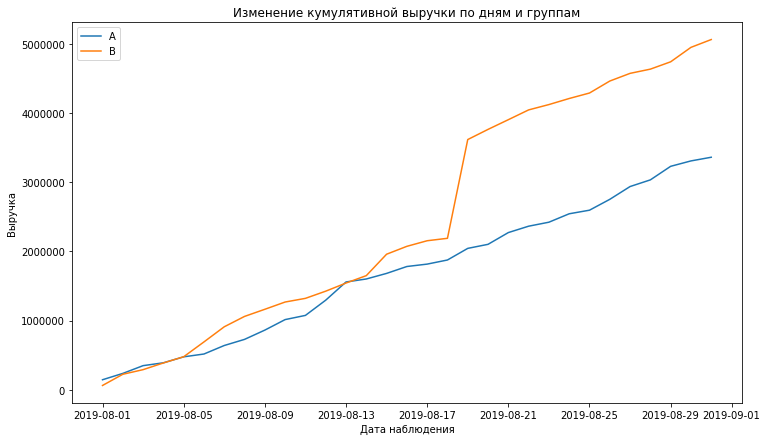

In [21]:
datesGroups = orders[["date", "group"]].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(orders["date"] <= x["date"], orders["group"] == x["group"])
    ].agg(
        {
            "date": "max",
            "group": "max",
            "transactionId": "nunique",
            "visitorId": pd.Series.nunique,
            "revenue": "sum",
        }
    ),
    axis=1,
).sort_values(by=["date", "group"])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(visitors["date"] <= x["date"], visitors["group"] == x["group"])
    ].agg({"date": "max", "group": "max", "visitors": "sum"}),
    axis=1,
).sort_values(by=["date", "group"])

cumulativeData = ordersAggregated.merge(visitorsAggregated, on=["date", "group"])

cumulativeData.columns = ["date", "group", "orders", "buyers", "revenue", "visitors"]

cumulativeRevenueA = cumulativeData[cumulativeData["group"] == "A"]
cumulativeRevenueB = cumulativeData[cumulativeData["group"] == "B"]


fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title("Изменение кумулятивной выручки по дням и группам")
ax.plot(cumulativeRevenueA["date"], cumulativeRevenueA["revenue"], label="A")
ax.plot(cumulativeRevenueB["date"], cumulativeRevenueB["revenue"], label="B")
ax.set_xlabel('Дата наблюдения')
ax.set_ylabel('Выручка')
ax.legend()


---

Выручка по группе А стабильно ниже группы B. В группе "А" 20 августа был большой выброс, который повлиял на увеличение разрыва между группами. 

### Кумулятивный средний чек

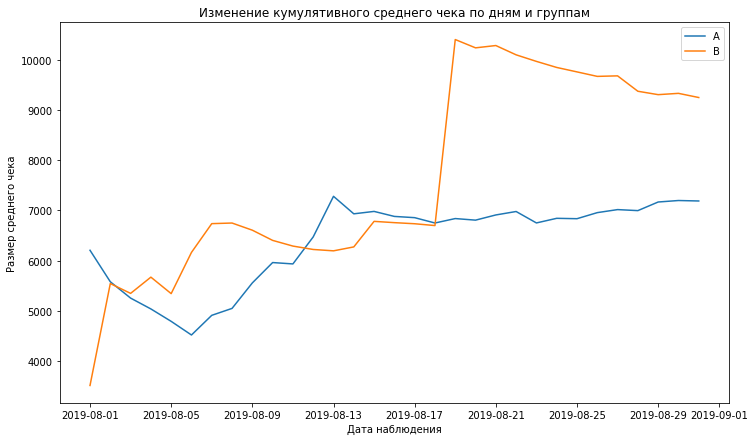

In [22]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Изменение кумулятивного среднего чека по дням и группам')
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
ax.set_xlabel('Дата наблюдения')
ax.set_ylabel('Размер среднего чека')
ax.legend()


Видим, что средний чек по группе A отстает почти с самого начала. 13 августа в этой группе был аномально высокий чек, что позволило на 2 дня обогнать группу B. 

В группе B заметны волновые скачки - 2, 6, 20 августа. В эти дни кумулятивный средний чек резко растёт, а потом постепенно снижается, что говорит о аномально высоких чеках в эти дни. 

### Относительное изменение среднего чека

Text(0, 0.5, 'Отношение среднего чека B к А')

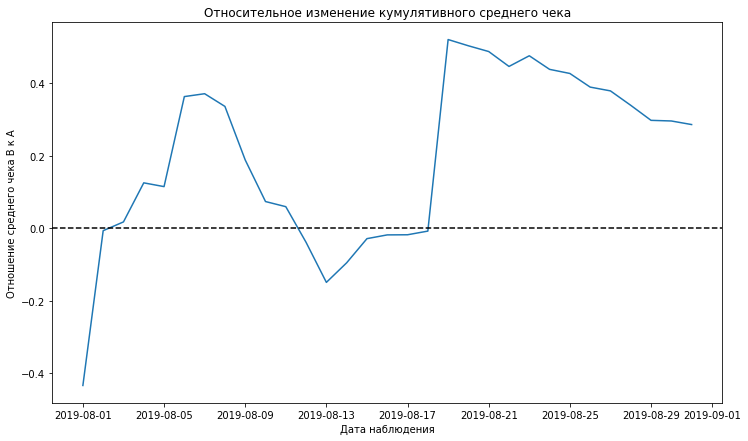

In [23]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on = ['date'], how = 'left', suffixes = ['A','B'])

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Относительное изменение кумулятивного среднего чека')
ax.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Дата наблюдения')
ax.set_ylabel('Отношение среднего чека B к А')


Группа B побеждает практически с самого начала, однако с 10 по 18 августа мы видим провал графика. В эти дни средний чек по группе A становился выше группы B. 

### Кумулятивная конверсия

Text(0, 0.5, 'Конверсия')

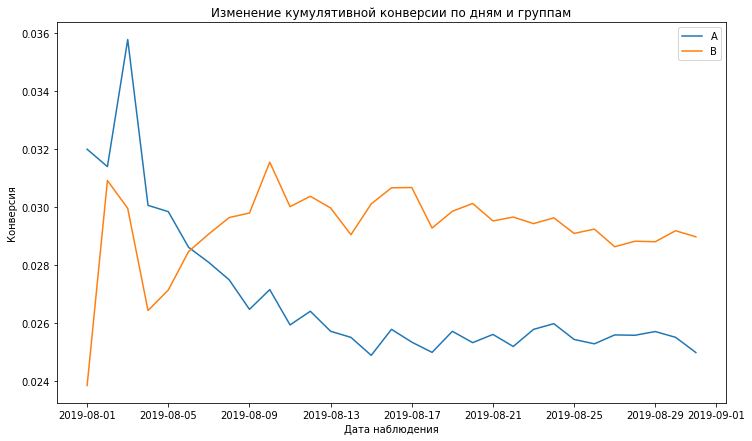

In [24]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Изменение кумулятивной конверсии по дням и группам')
ax.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')
ax.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
ax.legend()
ax.set_xlabel('Дата наблюдения')
ax.set_ylabel('Конверсия')




Конверсия также выше в грeппе B, хотя группа А в первую неделю показывала лучшие результаты.  

### Относительное изменение кумулятивной конверсии

Text(0, 0.5, 'Отношение конверсии B к А')

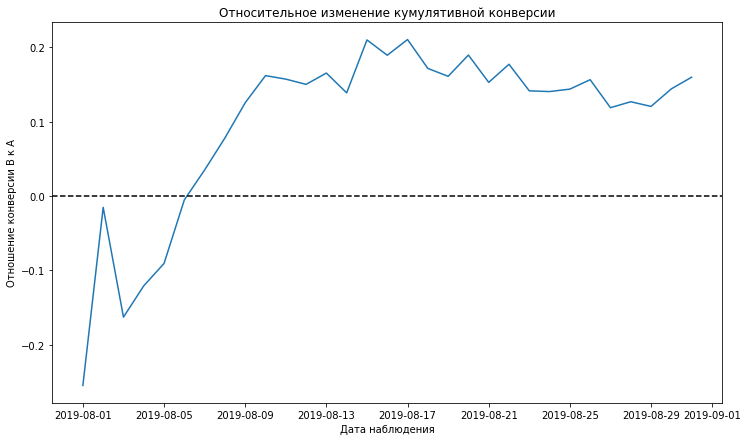

In [25]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

cumulativeDataMerge = cumulativeDataA.merge(cumulativeDataB, on='date', how = 'left', suffixes=['A','B'])

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Относительное изменение кумулятивной конверсии')
ax.plot(cumulativeDataMerge['date'], cumulativeDataMerge['conversionB']/cumulativeDataMerge['conversionA']-1)
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel('Дата наблюдения')
ax.set_ylabel('Отношение конверсии B к А')


На графике видим, что группа B выигрывает по конверсии группу A.

### Количество заказов по пользователям

Text(0, 0.5, 'Количество заказов')

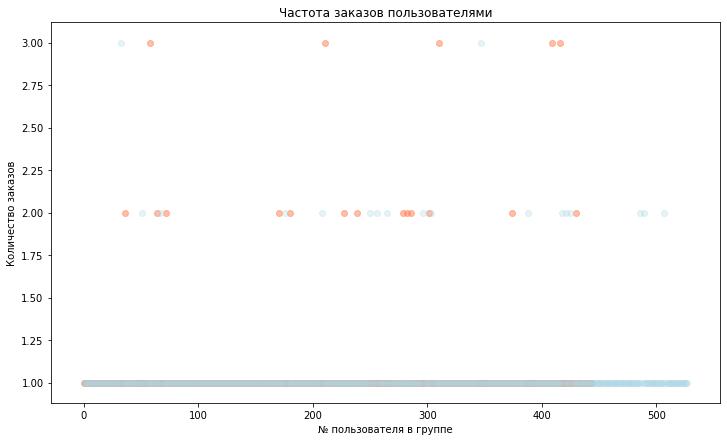

In [26]:
ordersByUsers = orders.groupby('visitorId', as_index = False).agg({'transactionId':'nunique', 'group':'max'})
ordersByUsers.columns = ['visitorId', 'orders', 'group']




ordersByUsersA = ordersByUsers[ordersByUsers['group']=='A']['orders']
x_values_a = pd.Series(range(0,len(ordersByUsersA)))

ordersByUsersB = ordersByUsers[ordersByUsers['group']=='B']['orders']
x_values_b = pd.Series(range(0,len(ordersByUsersB)))

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Частота заказов пользователями')
ax.scatter(x_values_a, ordersByUsersA, c='coral', alpha = 0.5)

ax.scatter(x_values_b, ordersByUsersB, c='lightblue', alpha = 0.3)
ax.set_xlabel('№ пользователя в группе')
ax.set_ylabel('Количество заказов')


Обычно на одного пользователя приходится 1 заказ, реже 2-3. Больше 3 заказов делают совсем редко.

### 95-й и 99-й перцентили количества заказов

In [27]:
np.percentile(ordersByUsers['orders'], [90,95,99])

array([1., 1., 2.])

Не более 5% пользователей заказывали более 2 раз. Более 4 раз заказывал всего 1% пользователей. Границу для отсечения выбросов можно определить в 3 и более заказа. 

### Стоимость заказов по пользователям 

Text(0, 0.5, 'Стоимость заказа')

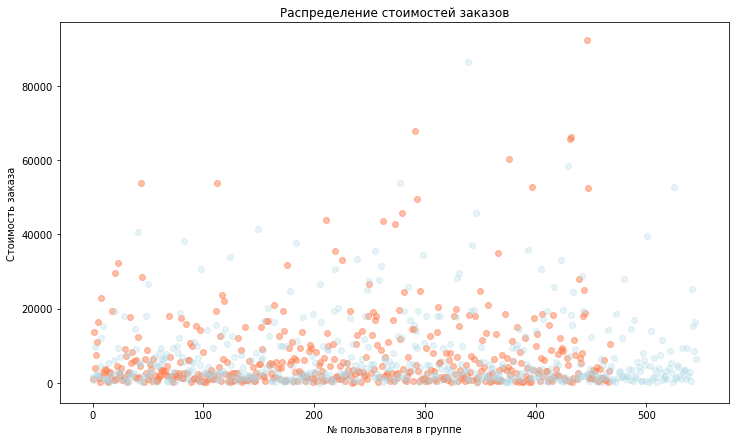

In [28]:
x_values_a_2 = pd.Series(range(0,len(orders[(orders['revenue']<200000)&(orders['group']=='A')]['revenue'])))
x_values_b_2 = pd.Series(range(0,len(orders[(orders['revenue']<200000)&(orders['group']=='B')]['revenue'])))

fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Распределение стоимостей заказов')
ax.scatter(x_values_a_2, (orders[(orders['revenue']<200000)&(orders['group']=='A')]['revenue']), c='coral', alpha = 0.5)

ax.scatter(x_values_b_2, (orders[(orders['revenue']<200000)&(orders['group']=='B')]['revenue']), c='lightblue', alpha = 0.3)
ax.set_xlabel('№ пользователя в группе')
ax.set_ylabel('Стоимость заказа')

Без увеличения масштаба не видно, как меняется распределение частоты заказов. Сделали выборку с заказами до 200 000 у.е.

Граница проходит где-то на 40 тысячах. 

### 95-й и 99-й перцентили стоимости заказов

In [29]:
np.percentile(orders['revenue'], [90,95,99])

array([17990., 26785., 53904.])

Стоимость не более 10% заказов превышает 17 990 у.е., не более 5% превышает 26 785 у.е., не более 1% превышает 53 904 у.е. 

### Расчёт статистической значимости различий в конверсии по "сырым" данным

<div class="alert alert-info">
Для дальнейшего анализа сформулируем нулевую и альтернативную гипотезу для каждого из тестов. <br>
    <br>
    Сравнение конверсии: <br>
    h0 - уровень конверсии в группах А и В не  отличается. Группы принадлежат одной генеральной совокупности. <br>
    h1 - уровень конверсии в группах различается. Группы принадлежат к разным генеральным совокупностям.  <br>
     <br>
    Сравнение средних чеков: <br>
    h0 - средний чек в группах А и В не отличается. Группы принадлежат одной генеральной совокупности. <br>
    h1 - средний чек в группах А и В различается. Группы принадлежат к разным генеральным совокупностям. <br>
    <br>
    Уровень статистической значимости для обоих тестов определен в alpha = 0.05.
</div>

In [30]:
ordersByDateAndGroup = (
    orders.groupby(['date','group'], as_index = False)
    .agg({'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'})
)

ordersByDateAndGroup = ordersByDateAndGroup.rename(columns = {'transactionId':'orders', 'visitorId':'buyers'})

ordersByDateAndGroup = ordersByDateAndGroup.merge(visitors, on = ['date','group'])
ordersByDateAndGroup['conversion'] = ordersByDateAndGroup['orders']/ordersByDateAndGroup['visitors']

conversionA = ordersByDateAndGroup[ordersByDateAndGroup['group']=='A']
conversionB = ordersByDateAndGroup[ordersByDateAndGroup['group']=='B']

alpha = 0.05

p_value = st.mannwhitneyu(conversionA['conversion'], conversionB['conversion'])[1]
print('Разница между среднми конверсий двух групп составляет: {0:.2%}'.format(conversionB['conversion'].mean()/conversionA['conversion'].mean()-1))
print()
print("P-value равняется {0:.2f} ".format(p_value))

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else: 
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

Разница между среднми конверсий двух групп составляет: 17.51%

P-value равняется 0.03 
Отвергаем нулевую гипотезу: разница статистически значима


Относительный выигрыш группы B к группе А по конверсии составляет 17,51%. Удалось доказать статистическую значимость этих различий. Есть основания отвергнуть нулевую гипотезу. 

### Расчёт статистической значимости различий в среднем чеке заказа между группами по "сырым" данным

In [31]:
recieaptsA = conversionA['revenue']/conversionA['orders']
recieaptsB = conversionB['revenue']/conversionB['orders']

alpha = 0.05

p_value = st.mannwhitneyu(recieaptsA, recieaptsB)[1]
print('Разница между среднми чеками двух групп составляет: {0:.2%}'.format(recieaptsB.mean()/recieaptsA.mean()-1))
print()
print("P-value равняется {0:.8f} ".format(p_value))

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else: 
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

Разница между среднми чеками двух групп составляет: 20.33%

P-value равняется 0.47754572 
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Группа B выигрывает группу А на 20.33 % по среднему чеку, однако нам не удалось обнаружить статистическую значимость. 

###  Расчёт статистической значимости различий в конверсии по "очищенным" данным

In [32]:
usersWithManyOrders = ordersByUsers[ordersByUsers['orders'] > 1]['visitorId']
usersWithExpensiveOrders = orders[orders['revenue'] >= 26785]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders,usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

abnormalUsers.count()

86

Всего 86 пользователей, совершавшего аномальные заказы. Посчитаем нужные метрики без этих пользователей. 

In [33]:
orders_without_abnormal = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

In [34]:
groups_without_abnormal = (
    orders_without_abnormal.groupby(['date','group'], as_index = False)
    .agg({'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'})
)

groups_without_abnormal = groups_without_abnormal.rename(columns = {'transactionId':'orders', 'visitorId':'buyers'})

# Рассчитаем количество визитов без пользователей, совершивших аномальные заказы
orders_with_abnormal = orders[orders['visitorId'].isin(abnormalUsers)]
group_abnormal = orders_with_abnormal.groupby(['date','group'], as_index = False).agg({'visitorId':'nunique'})
group_abnormal = group_abnormal.rename(columns={'visitorId':'abnormal'})
normal_visitors = visitors.merge(group_abnormal, on=['date','group'])
normal_visitors['normal'] = normal_visitors['visitors']-normal_visitors['abnormal']
normal_visitors = normal_visitors[['date','group','normal']]
normal_visitors = normal_visitors.rename(columns={'normal':'visitors'})

groups_without_abnormal = groups_without_abnormal.merge(normal_visitors, on = ['date','group'])
groups_without_abnormal['conversion'] = groups_without_abnormal['orders']/groups_without_abnormal['visitors']

sampleA = groups_without_abnormal[groups_without_abnormal['group']=='A']
sampleB = groups_without_abnormal[groups_without_abnormal['group']=='B']

alpha = 0.05

p_value = st.mannwhitneyu(sampleA['conversion'], sampleB['conversion'])[1]
print('Разница между средними конверсий двух групп составляет: {0:.2%}'.format(sampleB['conversion'].mean()/sampleA['conversion'].mean()-1))
print()
print("P-value равняется {0:.2f} ".format(p_value))

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else: 
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    ) 

Разница между средними конверсий двух групп составляет: 24.02%

P-value равняется 0.01 
Отвергаем нулевую гипотезу: разница статистически значима


Результаты в сравнении средних конверсий изменились - относительный выигрыш группы B увеличился, статистическая значимость разницы снова подтвердилась. 

### Расчёт статистической значимости различий в средних чеках по "очищенным" данным

In [35]:
mean_recieaptsA = sampleA['revenue']/sampleA['orders']
mean_recieaptsB = sampleB['revenue']/sampleB['orders']

alpha = 0.05

p_value = st.mannwhitneyu(mean_recieaptsA, mean_recieaptsB)[1]
print('Относительная разница между среднми чеками двух групп составляет: {0:.2%}'.format(mean_recieaptsB.mean()/mean_recieaptsA.mean()-1))
print()
print("P-value равняется {0:.2f} ".format(p_value))

if p_value < 0.05:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else: 
     print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

Относительная разница между среднми чеками двух групп составляет: -4.26%

P-value равняется 0.28 
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


Результаты сравнения средних чеков изменились в противоположную сторону. Теперь при относительном сравнении средних лидирует группа А на 4%, однако статистической значимости обнаружить не удалось. Оснований отклонить нулевую гипотезу нет. 

## Вывод

В данной работе мы провели приоретизацию гипотез методами ICE и RICE и отобрали лучшие, среди которых: 
- 'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа'
- 'Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей'
- 'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию'

Для проведения теста мы отобрали первую в списке гипотезу о том, что блоки рекомендаций увеличат конверсию и средний чек.

В ходе исследования результатов теста мы пришли к следующим выводам: 
- Группа B побеждает по всем кумулятивным показателям
- График по кумулятивной выручке двух групп стабилизировался, группа B стабильно побеждает
- График по кумулятивному среднему чеку нестабилен, в обоих группах сильное влияние выбросов. Группа B на конец периода побеждает, но имеет тенденции к падению. 
- Кумултивная конверсия двух групп стабилизировалась, группа B стабильно побеждает, несмотря на небольшое падение показателя. 

Тест Манна-Уитни по очищенным данным дал следующие результаты: 
- Нам удалось получить статистически значимую разницу между конверсией двух групп. Относительный выигрыш группы B составляет 24%. 
- Статистически значимую разницу при сравнении средних чеков обнаружить не удалось. Группа А выигрывает 3,73%, хотя до удаления выбросов выигрывала группа B на 24,44%. 

На основании полученных данных можно рекомендовать остановить тест. Группа B стабильно выигрывает по конверсии и здесь нам удалось получить статистическую разницу. По среднему чеку группа B проигрывает, явных тенденций к росту нет - вряд ли результаты смогут кардинально измениться в будущем. 